# Final Project AAI 501 - Heathcare Stroke Prediction
### Lauren Taylor, Ethan Schmitt, Kayla Wright

## Context:

Cerebrovascular accidents (known as strokes) can be detrimental to people's lives after they occur. There are two main types of strokes that can occur in a patient. First, there are ischemic strokes, which are the most common. Ischemic strokes occur when there is a blockage in the blood vessels to the brain. These can cause permanent damage to a specific part of the brain due to the blocked area not getting the blood or nutrients the neurons need to survive. The second type of stroke is called a hemorrhagic stroke which occurs when an artery in the brain breaks or leaks, which causes the excess blood to put pressure in the brain. These strokes cause long lasting damage due to death of brain tissue and the longer treatment is waited to be given, the more damage that occurs. It is important for a patient to know that they are at risk of developing a stroke so they can adjust their lifestyle and take special precautions to avoid such a detrimental occurrence. There are many risk factors for strokes such as: chronic high blood pressure, diabetes, heart diseases, high cholesterol levels, and smoking. This is not a full list of risk factors, but a patient's awareness of risk factors can reduce the risk of strokes by employing lifestyle changes and understanding signs and symptoms of stroke for quick identification. 


## Objectives:

- To use exploratory data anaysis to understand the dataset.
- To use logistic regression to predict people that have had strokes from this dataset.
- To use and refine a decision tree to predict people that have had strokes in the dataset.
- To have a better understanding of the types of patients at risk for developing a stroke and what the most telling risk factors are.

## Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
# To tune decsion tree models
from sklearn.model_selection import GridSearchCV
# To get metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve
)

In [ ]:
# Importing dataset
from google.colab import files
upload = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Data Dictionary


- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- 12) stroke: 1 if the patient had a stroke or 0 if not

## Sanity Checks

In [ ]:
# Checking if the dataset was imported correctly
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Checking the shape of the dataset
df.shape

(5110, 12)

- This dataset has 5110 rows and 12 coulmns.

In [ ]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Checking for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# CHecking for duplicated rows
df[df.duplicated()].count()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Let's take a look at a good statistical description of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


Statisical description insights: 
- Top gender is female in this dataset.
- Age ranges from 22.6 to 82 years old but the mean is around 43.
- The most frequent is yes in marriage.
- Most frequent work type is private.
- Most frequent residence type is urban. 
- Average glucose level is around 106 but it ranges from about 45 to about 272.
- Average BMI also has a large range of about 10 to about 98, but the mean is 45 BMI.
- Most commonly people in this dataset do not smoke.


In [ ]:
# Checking the class weights for the target variable
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

This dataset is heavily weighed towards no stroke for 95% no stroke and 0.05% having a stroke. I will need to account for this in my model. Either I will need to oversample my data or adjust the class weights.


In [ ]:
# Dropping ID because it has no useful information as we will use Pandas indexing
df.drop("id", axis=1, inplace=True)

In [ ]:
data = df.copy()

## Exploratory Data Analysis:

## Univariate Analysis

In [ ]:
def boxplot_histogram(data, feature, title, figsize = (12,10), kde = False, bins = None):
  
  # This function makes a boxplot and a histogram
  # data: dataframe, feature: column of dataframe, figsize: size of figure
  #kde: show curve density, bins: number of bins for the hist plot 

  # Setting up figure size, rows
  f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios":(0.25, 0.75)}, figsize = figsize)
  # Creating boxplot
  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")
  # Creating histplot
  sns.histplot(
    data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="violet"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
  # Putting mean on histogram
  ax_hist2.axvline(data[feature].mean(), color = "black", linestyle = "--")
  plt.title(title)
  # Putting median to histogram
  ax_hist2.axvline(data[feature].median(), color = "green", linestyle = "-")

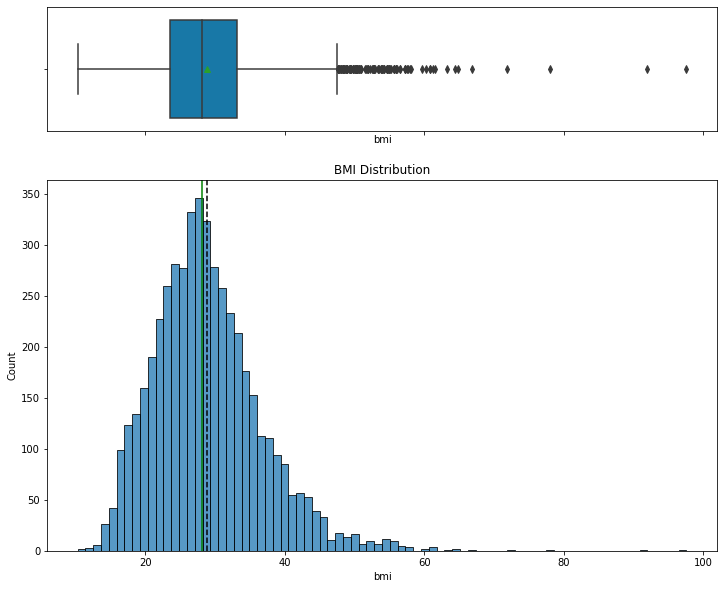

In [ ]:
boxplot_histogram(df, "bmi", "BMI Distribution")

- Since BMI has missing values and has a slight right skew, then I will impute the missing values with the median.

## Multivariate Analysis

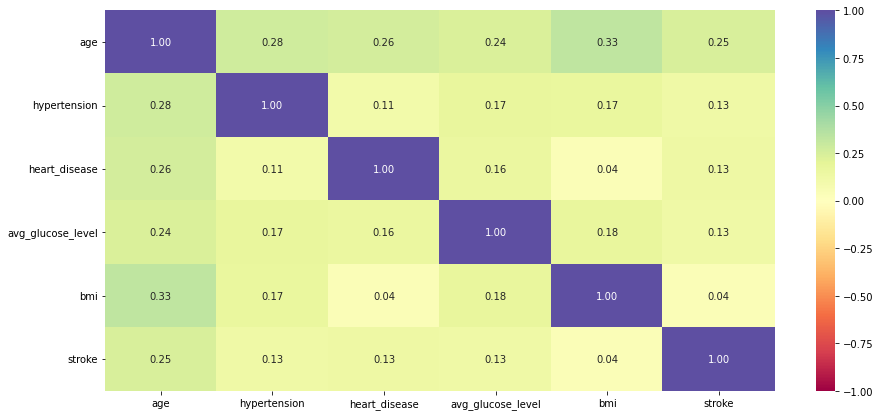

In [ ]:
# Code below makes a heatmap to see important correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The highest correlations for stroke are age (0.25), high blood pressure (0.13), heart disease (0.13), and average glucose level (0.13).

In [ ]:
stroke1 = data[data['stroke'] == 1]
stroke0 = data[data['stroke'] == 0]

Text(0.5, 1.0, 'Distribution of Age')

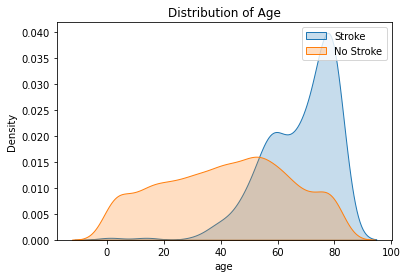

In [ ]:
# Distribution of age
# Blue = stroke
# Orange = no stroke
sns.kdeplot(stroke1['age'], shade = True,label = "Stroke")
sns.kdeplot(stroke0['age'], shade = True, label = "No Stroke")
plt.legend()
plt.title("Distribution of Age")

- It seems older people have had strokes the more frequently.

Text(0.5, 1.0, 'Distribution of Avg. Glucose Level')

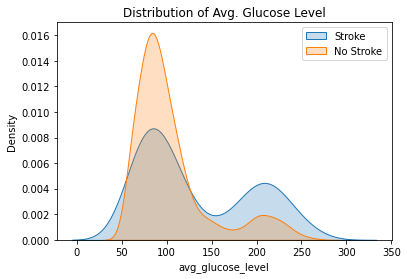

In [ ]:
# Average glucose level
sns.kdeplot(stroke1['avg_glucose_level'], shade = True, label = "Stroke")
sns.kdeplot(stroke0['avg_glucose_level'], shade = True, label = "No Stroke")
plt.legend()
plt.title("Distribution of Avg. Glucose Level")

- Glucose levels around 90 and 210 have humps where more strokes are common.

Text(0.5, 1.0, 'BMI Distribution')

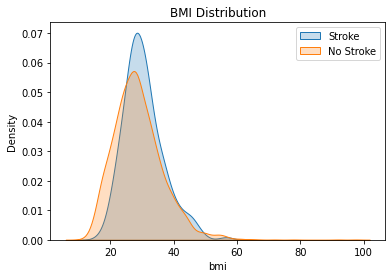

In [ ]:
# Bmi distribution
sns.kdeplot(stroke1['bmi'], shade = True,label = "Stroke")
sns.kdeplot(stroke0['bmi'],shade = True,label = "No Stroke")
plt.legend()
plt.title("BMI Distribution")

- BMI does not seem to cause strokes, the distributions are almost the same size.

In [ ]:
# This function makes a stacked barplot
# Data: dataset that needs to be graphed
# Predictor: X variable
# Target: Y Variable
def stacked_barplot(data, predictor, target, title, ylabel):
    # Count the predictor
    count = data[predictor].nunique()
    # Sort the target so it can be graphed
    sorter = data[target].value_counts().index[-1]
    # Crosstab computes a simple cross tabulation of two or more factors
    # Cross tabulation of predictor and target
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    # Cross tabulation between the variables but normalized for graphing purposes
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    # Plotting normalized tabulation
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="lower left", frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()


stroke     0    1   All
gender                 
All     4861  249  5110
Female  2853  141  2994
Male    2007  108  2115
Other      1    0     1
------------------------------------------------------------------------------------------------------------------------


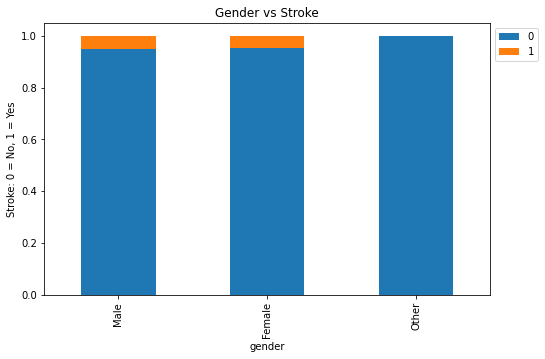

In [ ]:
stacked_barplot(df, "gender", "stroke", "Gender vs Stroke", "Stroke: 0 = No, 1 = Yes")


- There seems to be no correlation between men who have strokes and women who have strokes.

stroke             0    1   All
Residence_type                 
All             4861  249  5110
Urban           2461  135  2596
Rural           2400  114  2514
------------------------------------------------------------------------------------------------------------------------


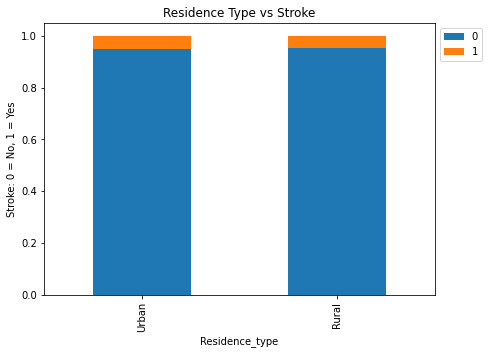

In [ ]:
#1 = Rural
stacked_barplot(df, "Residence_type", "stroke", "Residence Type vs Stroke","Stroke: 0 = No, 1 = Yes")

- There seems to be no difference between people who live in urban and rural settings who have strokes.

stroke           0    1   All
hypertension                 
All           4861  249  5110
0             4429  183  4612
1              432   66   498
------------------------------------------------------------------------------------------------------------------------


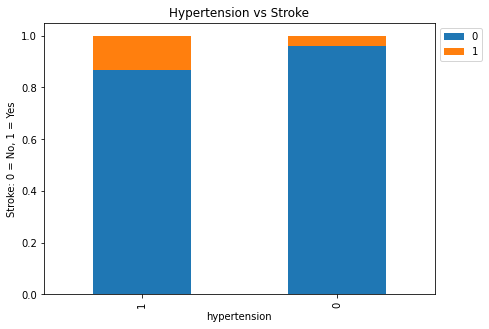

In [ ]:
stacked_barplot(df, "hypertension", "stroke", "Hypertension vs Stroke","Stroke: 0 = No, 1 = Yes")

- People who have hypertension are much more likely to have a stroke. This is for sure an identifying factor in this dataset.

stroke            0    1   All
heart_disease                 
All            4861  249  5110
0              4632  202  4834
1               229   47   276
------------------------------------------------------------------------------------------------------------------------


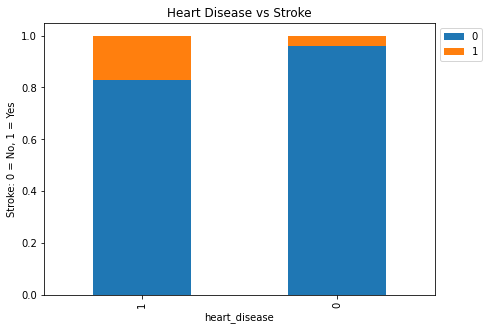

In [ ]:
stacked_barplot(df, "heart_disease", "stroke", "Heart Disease vs Stroke","Stroke: 0 = No, 1 = Yes")

- People who have heart disease in this dataset are much more likely to have a stroke. This will be a good identifying factor for our models.

stroke           0    1   All
ever_married                 
All           4861  249  5110
Yes           3133  220  3353
No            1728   29  1757
------------------------------------------------------------------------------------------------------------------------


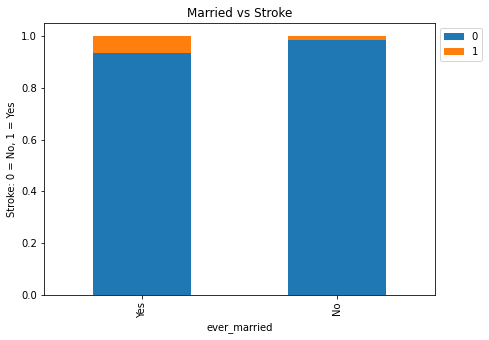

In [ ]:
stacked_barplot(df, "ever_married", "stroke", "Married vs Stroke","Stroke: 0 = No, 1 = Yes")

- People who are married are more likely to have a stroke. While interesting, this is a good thing to keep in mind during our model building.

stroke            0    1   All
work_type                     
All            4861  249  5110
Private        2776  149  2925
Self-employed   754   65   819
Govt_job        624   33   657
children        685    2   687
Never_worked     22    0    22
------------------------------------------------------------------------------------------------------------------------


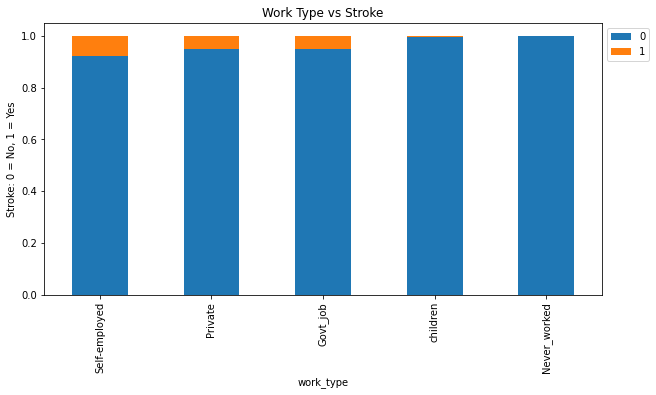

In [ ]:
stacked_barplot(df, "work_type", "stroke", "Work Type vs Stroke","Stroke: 0 = No, 1 = Yes")

- Self employed people are for some reason more likely to suffer a stroke.

stroke              0    1   All
smoking_status                  
All              4861  249  5110
never smoked     1802   90  1892
formerly smoked   815   70   885
Unknown          1497   47  1544
smokes            747   42   789
------------------------------------------------------------------------------------------------------------------------


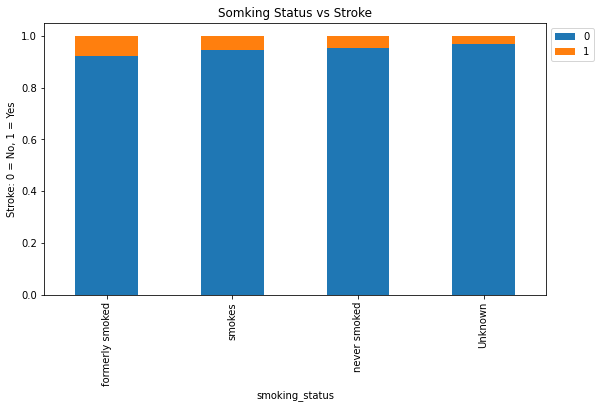

In [ ]:
stacked_barplot(df, "smoking_status", "stroke", "Somking Status vs Stroke","Stroke: 0 = No, 1 = Yes")

- People who formerly smoked have the highest chance of developing a stroke in this dataset. 

## EDA Insights:

- People with a higher age are more likely to have a stroke. 
-People with high blood pressure are more likely to also have a stroke. 
- Heart disease patients are the more likely to have  stroke. 
- Married patients are most likely to have a stroke. 
- People with jobs (mostly self employed) are more likely to have a stroke. 

In [ ]:
# The data is slightly right skewed so I will replace the missing values with the median
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

In [ ]:
# Checking for null values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data = df.copy()

# Model Building: Decision Tree





In [ ]:
#df.drop("gender", axis=1, inplace=True)
#df.drop("bmi", axis=1, inplace=True)
df.drop("Residence_type", axis=1, inplace=True)

In [ ]:
# creating dummy varibles
dummies = pd.get_dummies(df, columns=["ever_married", "gender", "work_type",  "smoking_status" ])
dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
X = dummies.drop("stroke", axis=1)  # Features
y = dummies["stroke"].astype("int64")  # Labels (Target Variable)

In [ ]:
# splitting data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape)

(3577, 19) (1533, 19)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3577
Number of rows in test data = 1533


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.953592
1    0.046408
Name: stroke, dtype: float64
Percentage of classes in test set:
0    0.945858
1    0.054142
Name: stroke, dtype: float64


In [ ]:
# This function makes the confusion matrix
# Model: Model run for classification
# Predictors: X values independent
# Target: Y values
# Threshold: Threshold for classfying as class one
def confusionmatrix(model, predictors, target, threshold=0.5):
    pred_probability = model.predict_proba(predictors)[:, 1]
    pred_threshold = pred_probability > threshold
    predictor = np.round(pred_threshold)
    # Starting the confusion matrix
    confusion = confusion_matrix(target, predictor)
    # Creating labels for confusion matrix in an np array
    label = np.asarray(
        [["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / confusion.flatten().sum())]
            for item in confusion.flatten()]).reshape(2, 2)
    # Plotting confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion, annot=label, fmt="")
    plt.ylabel("True")
    plt.xlabel("Predicted")

In [ ]:
# Defining a function that uses sklearn to calculate performance
# Model in question
# Predictors: X variables
# Target: Y variable
def performance(model, predictors, target, threshold=0.5):
    # predicting using the independent variables
    probability = model.predict_proba(predictors)[:, 1]
    pthreshold = probability > threshold
    pred = np.round(pthreshold)
    # Getting metrics from sklearn
    accuracy = accuracy_score(target, pred)
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred) 
    f1 = f1_score(target, pred) 
    # Making a df of metrics
    perf = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index=[0],)
    return perf

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

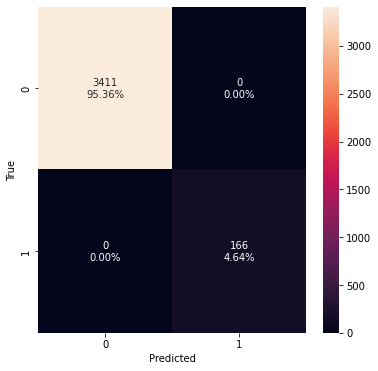

In [ ]:
confusionmatrix(model, X_train, y_train)

In [ ]:
model_1_performance = performance(model, X_train, y_train)
print("Training performance:")
print(model_1_performance)

Training performance:
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


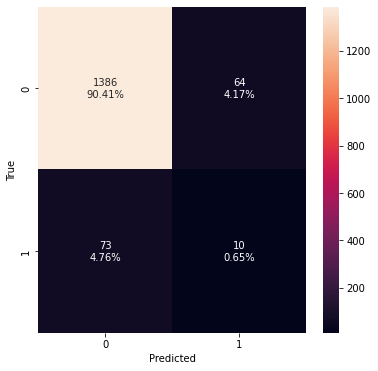

In [ ]:
confusionmatrix(model, X_test, y_test)

In [ ]:
model_1_performance_test = performance(model, X_test, y_test)
print("Testing performance:")
print(model_1_performance_test)

Testing performance:
   Accuracy    Recall  Precision  F1 Score
0  0.910633  0.120482   0.135135  0.127389


- This model is heavily overfit. I may need to limit branches, prune, adjust class weights, or oversample the data.

In [ ]:
# Taking a look at the tree
feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

- This tree is much too complex, I will use Grid CV to find more optimal perameters. This model is very overfit.

In [ ]:
# Now I will do some prepruning using GridSearchCV!
# Choose the type of classifier.
# I will use the class weight used in the MLS2 because it helps a lot
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.05, 1: 0.95})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

In [ ]:
confusionmatrix(estimator, X_train, y_train)

In [ ]:
model_1_performance = performance(estimator, X_train, y_train)
print("Training performance:")
print(model_1_performance)

In [ ]:
confusionmatrix(estimator, X_test, y_test)

In [ ]:
model_1_performance_test = performance(estimator, X_test, y_test)
print("Testing performance:")
print(model_1_performance_test)

In [ ]:
# Taking a look at the tree
feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

- Using Grid Search CV this is the superior model at perameters: (class_weight={0: 0.05, 1: 0.95}, criterion='entropy', max_depth=5, min_impurity_decrease=0.01, random_state=1, splitter='random')

## Model Building: Logistic Regression

In [ ]:
# Linear Regression

#conda install -c conda-forge imbalanced-learn

#conda update --all scikit-learn

#conda list
from imblearn.over_sampling import SMOTE

In [ ]:

# Show data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Data with NaN's
data[data.isnull().any(axis=1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
# Number of individuals who had strokes (before data cleaning)
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# Drop all rows with null values
data1 = data.dropna()

# Drop gender = other
data1 = data1[data1.gender != "Other"]

# Drop work type
data1 = data1.drop(['work_type'], axis=1)

In [ ]:
data1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


In [ ]:
# Convert categorical values into binary variables
dummies = pd.get_dummies(data1, columns=["ever_married", "gender",  "smoking_status", "Residence_type" ])
dummies.head()

data1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


In [ ]:
# Number of stroke wihout NaN
data1['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [ ]:
# Number of heart disease 
data1['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [ ]:
# Number of hypertension 
data1['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [ ]:
# Use SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(data1.iloc[:,1:],data1['stroke'])

X_resampled = X_resampled.drop(['stroke'], axis=1)

X_resampled

ValueError: ignored

In [ ]:
y_resampled.value_counts()

In [ ]:
data1 = X_resampled
data1['stroke'] = y_resampled

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix,accuracy_score)
from sklearn.preprocessing import StandardScaler

# Use set of predictors
new_data1 = data1.drop(['heart_disease','hypertension','bmi'], axis=1)

# Train and test data
X_train, X_test, y_train, y_test = train_test_split(new_data1.iloc[0:,0:9], 
y_resampled, test_size = 0.2, random_state = 3)

In [ ]:
# Scale data
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [ ]:
# Train model
model2 = sm.Logit(y_train,X_train).fit()

# Print model summary
print(model2.summary())

In [ ]:
# Convert data points to 1 and 0 based on threshold
def convert(lst,x):
    out = []
    for i in range(len(lst)):
        if lst[i] >= x:
            out.append(1)
        else:
            out.append(0)
    return out

In [ ]:
# Accuaracy Score,train
y_pred_train2 = model2.predict(X_train)
y_train_lst2 = convert(list(y_pred_train2),.4)
score3 = accuracy_score(y_train, y_train_lst2)
print(score3)

In [ ]:
# Accuaracy Score, test
y_pred2 = model2.predict(X_test)
y_test_lst2 = convert(list(y_pred2),.4)
score4 = accuracy_score(y_test, y_test_lst2)
print(score4)

In [ ]:
y_test.value_counts()

In [ ]:
# Confusion matrix 
conf_matrix2 = confusion_matrix(y_test,y_test_lst2)
print(conf_matrix2)

In [ ]:
# ROC Curve
from sklearn import metrics
#fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test),np.array(y_pred2))

#plt.plot(fpr,tpr)
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curve")

In [ ]:
# Find the roc auc score for testing data
logit_roc_auc_test = roc_auc_score(
    y_test, model2.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, model2.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

In [ ]:
# Calculate area under curve
auc = metrics.roc_auc_score(y_test, y_pred2)
print(auc)

## Note that 0's are labeled as "positive" so the bottom right corner is actually the false negative (ie labeled 0 when actually 1)
